# Grid Searching and Time Series Forecasting

Use the data below to set up a `Pipeline` that one hot encodes all categorical features and builds a `RandomForestClassifier` model.  Grid search the model for an appropriate `n_estimators` and `max_depth` parameter optimizing precision.  What were the parameters of the best model?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
insurance = fetch_openml(data_id=45064)

In [4]:
insurance.frame.head()

,Upper_Age,Lower_Age,Reco_Policy_Premium,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,class
0,52,52,16200.0,C2,Owned,Individual,No,X4,6.0,4.0,0
1,67,67,16900.0,C17,Rented,Individual,No,X1,7.0,3.0,1
2,75,75,25668.0,C10,Owned,Individual,No,X3,3.0,1.0,0
3,60,57,17586.8,C26,Owned,Joint,Yes,X1,14+,1.0,0
4,35,35,12762.0,C12,Rented,Individual,No,X1,3.0,2.0,0


In [5]:
insurance.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23548 entries, 0 to 23547
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Upper_Age                23548 non-null  int64   
 1   Lower_Age                23548 non-null  int64   
 2   Reco_Policy_Premium      23548 non-null  float64 
 3   City_Code                23548 non-null  category
 4   Accomodation_Type        23548 non-null  category
 5   Reco_Insurance_Type      23548 non-null  category
 6   Is_Spouse                23548 non-null  category
 7   Health Indicator         23548 non-null  category
 8   Holding_Policy_Duration  23548 non-null  category
 9   Holding_Policy_Type      23548 non-null  category
 10  class                    23548 non-null  int64   
dtypes: category(7), float64(1), int64(3)
memory usage: 899.9 KB


In [6]:
insurance.frame.describe()

,Upper_Age,Lower_Age,Reco_Policy_Premium,class
count,23548.000000,23548.000000,23548.000000,23548.000000
mean,48.864192,46.365381,15409.000161,0.242059
std,16.021466,16.578403,6416.327319,0.428339
min,21.000000,16.000000,3216.000000,0.000000
25%,35.000000,32.000000,10704.000000,0.000000
50%,49.000000,46.000000,14580.000000,0.000000
75%,62.000000,60.000000,19140.000000,0.000000
max,75.000000,75.000000,43350.400000,1.000000


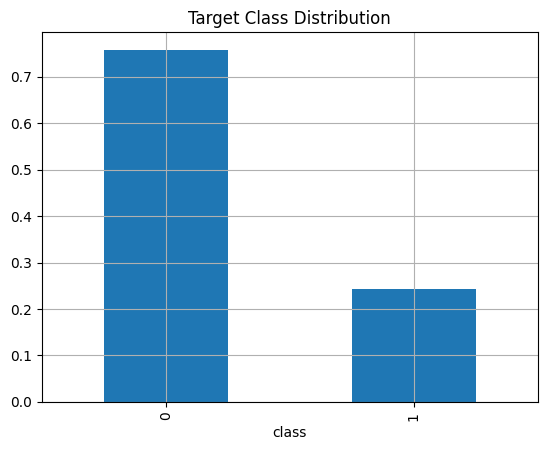

In [7]:
insurance.frame['class'].value_counts(normalize = True).plot(kind = 'bar', grid = True, title = 'Target Class Distribution');

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

### Time Series

For these problems I will reference Hyndman's [*Forecasting: Principles and Practice*](https://otexts.com/fpp3/).  At a minimum, skim chapter 8.1 - 8.4 on Exponential Smoothing methods and 9.1 - 9.5 and 9.9 on ARIMA models.  We will replicate some examples and problems from the text using `sktime`.  Reference the documentation [here](https://www.sktime.net/en/stable/index.html) when needed.



In [9]:
!pip install sktime

In [10]:
import sktime as skt
from sktime.utils.plotting import plot_correlations, plot_series

**PROBLEM**

In 8.1, a simple exponential smoothing model is applied to the algerian export data, and a forecast is made for 5 time steps.  Use `sktime` and the `global_economy` data below to replicate this and evaluate the mean absolute percent error.  

In [11]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

In [12]:
global_economy = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa24/refs/heads/main/data/global_economy.csv', index_col = 0)

In [13]:
algeria = global_economy.loc[global_economy['Country'] == 'Algeria']

In [14]:
algeria.head(3)

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
117,Algeria,DZA,1960,2.723649e+09,NaN,NaN,67.143632,39.043173,11124888.0
118,Algeria,DZA,1961,2.434777e+09,-13.605441,NaN,67.503771,46.244557,11404859.0
119,Algeria,DZA,1962,2.001469e+09,-19.685042,NaN,20.818647,19.793873,11690153.0


**PROBLEM**

Use the data on the Australian population to replicate the exponential smoothing model with a trend from 8.2 [here](https://otexts.com/fpp3/holt.html#example-australian-population).

In [15]:
aus_economy = global_economy.loc[global_economy['Country'] == 'Australia']

**PROBLEM**

Use the data below on Australian tourism to fit a Holt Winters model with additive and multiplicative seasonality.  Compare the performance using `mape` and plot the results with `plot_series`.

In [16]:
aus_tourism = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa24/refs/heads/main/data/aus_holidays.csv', index_col = 0)
aus_tourism.head()

,Quarter,Trips
1,1998 Q1,11.806038
2,1998 Q2,9.275662
3,1998 Q3,8.642489
4,1998 Q4,9.299524
5,1999 Q1,11.172027


**PROBLEM**

An example of non-stationary data are stock prices.  Use the stock dataset below to plot the daily closing price for Amazon.  Use differencing to make the series stationary and compare the resulting autocorrelation plots.

In [17]:
stocks = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa24/refs/heads/main/data/gafa_stock.csv', index_col = 0)
stocks.head()

,Symbol,Date,Open,High,Low,Close,Adj_Close,Volume
1,AAPL,2014-01-02,79.382858,79.575714,78.860001,79.018570,66.964325,58671200.0
2,AAPL,2014-01-03,78.980003,79.099998,77.204285,77.282860,65.493416,98116900.0
3,AAPL,2014-01-06,76.778572,78.114288,76.228569,77.704285,65.850533,103152700.0
4,AAPL,2014-01-07,77.760002,77.994286,76.845711,77.148575,65.379593,79302300.0
5,AAPL,2014-01-08,76.972855,77.937141,76.955711,77.637146,65.793633,64632400.0


**PROBLEM**

Use the data on australian air passengers below to fit an `AutoARIMA` model with `sktime`.  What parameters were chosen?  Plot the model and evaluate its predictions on 10 time steps.

In [18]:
aus_air = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa24/refs/heads/main/data/aus_air.csv', index_col = 0)
aus_air.head()

,Year,Passengers
1,1970,7.3187
2,1971,7.3266
3,1972,7.7956
4,1973,9.3846
5,1974,10.6647
